<a href="https://colab.research.google.com/github/Migaalee/PAD/blob/main/PAD_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.

### Upload data and setup 

(files is here: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_Quantity_kg_Data.csv). Download all 32 columns. 
During this tutorial we will be using Python and make use of the following libraries:

In [ ]:
# Warning for handling warning messages
import warnings
warnings.filterwarnings(action='ignore')
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [ ]:
!pip install plotly==4.0.0

     |████████████████████████████████| 6.8MB 4.3MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.0.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score



In [ ]:
### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy
# in this case, we will just reshape predictions to (209,)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2)

In [ ]:
# load the text file
url = 'https://raw.githubusercontent.com/Migaalee/PAD/main/Food_Supply_Quantity_kg_Data_filtered.csv'
data = pd.read_csv(url)
data.shape
# Dataset is now stored in a Pandas Dataframe

(119, 10)

## Check how data is organised.

In [ ]:
my_list = list(data)

print (my_list)

['Alcoholic Beverages', 'Animal Products', 'Fish, Seafood', 'Stimulants', 'Sugar & Sweeteners', 'Vegetal Products', 'Obesity', 'Confirmed', 'Deaths', 'Recovered']


In [ ]:
x = data[['Vegetal Products']].values
y = data[['Confirmed']].values


# 2. Regression Analysis

## Module I - Linear Regression Tutorial





### Tasks


- a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐
plot, and make a comment on it.

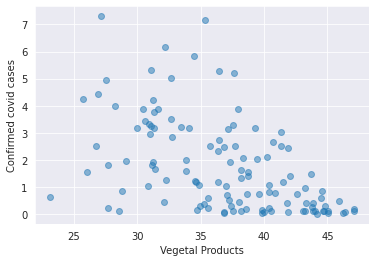

In [ ]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases');

In [ ]:
print(x.shape)
print(y.shape)


(119, 1)
(119, 1)


Estimate coefficient beta0 (both ways should match)

In [ ]:
# re-importing to ease readability
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

beta = dot(dot(inv(dot(x.T, x)),x.T),y) 
print('Estimated coefficient:', beta[0])

Estimated coefficient: [0.04339053]


In [ ]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta[0])

Estimated coefficients: [0.04339053]


- b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of 
the standardized residuals from this regression. Does the normal probability plot indicate 
acceptable normality, or is there any skewness? If a skewness, what is the type of it?

This is our simple regression $$Y = \beta X + \epsilon$$
without intercept

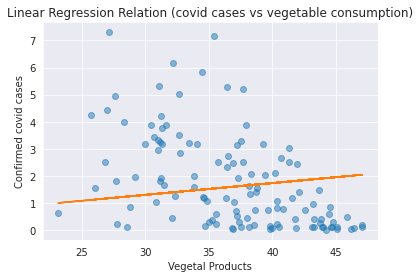

In [ ]:
predictions = x * (beta) # making use of numpy's broadcast
predictions_withouth_intercept = predictions
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (covid cases vs vegetable consumption)');
plt.plot(x, predictions) # overlay a line plot over a scatter plot 
plt.show()


Now lets improve the fit by adding ntercept term $\beta_0$ in your model as $\hat{Y} = \beta_0 + \beta_1X$.  To do this we need to calculate  $\beta_0$ by padding $X$ with a column of ones.

In [ ]:
ones_vector = np.ones(len(x)) 

# append constant term as a column of x
x = np.c_[ones_vector, x]

print(x[:5])




[[ 1.     27.1612]
 [ 1.     35.3838]
 [ 1.     32.1944]
 [ 1.     34.4636]
 [ 1.     31.0774]]


In [ ]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)


Estimated coefficients: [[ 7.60362259]
 [-0.1583189 ]]
Old shape of coefficients array: (2, 1)
New shape of coefficients array: (2, 1)


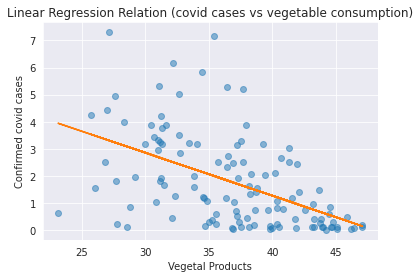

In [ ]:
# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (covid cases vs vegetable consumption)');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()

In [ ]:
print(x.shape)
print(y.shape)

(119, 2)
(119, 1)


Until here all good - do not change above lines

Obtain a normal probability plot of the standardized residuals from this regression.

In [ ]:
print(predictions.shape)
print(predictions.shape)
print(predictions_withouth_intercept.shape)
print(predictions_with_intercept.shape)
print(x.shape)
print(y.shape)
print(beta.shape)
y1=y[:,0]
print(y1.shape)

(119, 1)
(119, 1)
(119, 1)
(119, 1)
(119, 2)
(119, 1)
(2, 1)
(119,)


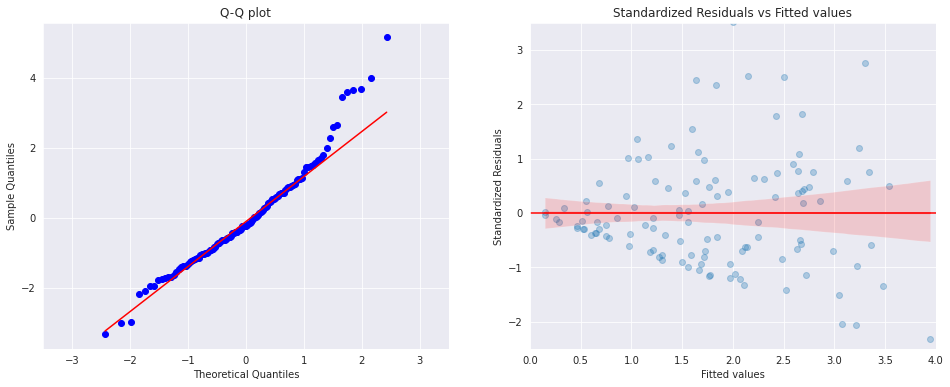

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y1 - predictions_with_intercept[:,0]
degrees_of_freedom = len(y1) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x)) 
             + (((x[:,1] - mean_independent_variable)**2) 
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=False, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-2.5,3.5)
axs[1].set_xlim(0,4)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

Does the normal probability plot indicate acceptable normality, or is there any skewness?

If a skewness, what is the type of it?
Normal probability plot (QQplot) indicates that residuals are slightly skewed and might be because of few outliers in the dataset. The condition that the error terms are normally distributed by visual representation is not met. However, additional tests for normality should be considered (e.g. Shapiro-Wilks normality test).

- c) Take the natural log of both of the variables and perform a linear regression on the transformed 
features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss 
if this probability plot indicates an acceptable level of normality?

In [ ]:
mask = y1 != 0
y_masked = y1[mask]
x_masked = x[mask]
y_masked = np.log(y_masked)
x_masked = np.log(x_masked)

Estimated coefficients: [ 0.         -0.05103439]


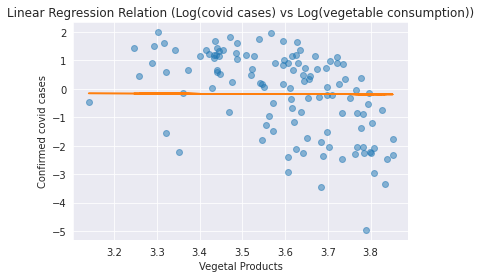

In [ ]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked,beta) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (Log(covid cases) vs Log(vegetable consumption))');
plt.plot(x_masked[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()



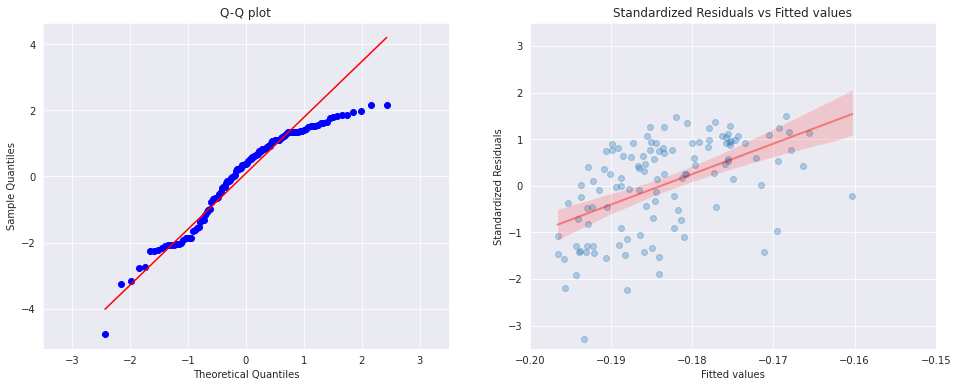

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x_masked[:,1])
leverage = ( (1/len(x_masked)) 
             + (((x_masked[:,1] - mean_independent_variable)**2) 
                / np.sum((x_masked[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=False, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(-0.2,-0.15)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

Transformed only Y values instead of both values

In [ ]:
mask = y1 != 0
y_masked = y1[mask]
x_masked1 = x[mask]
y_masked = np.log(y_masked)


Estimated coefficients: [ 5.10907811 -0.14270815]


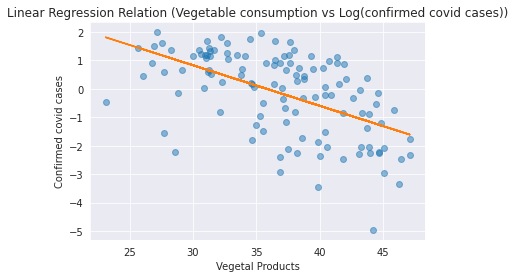

In [ ]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked1, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked1,beta) 

ax = sns.regplot(x=x_masked1[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (Vegetable consumption vs Log(confirmed covid cases))');
plt.plot(x_masked1[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()



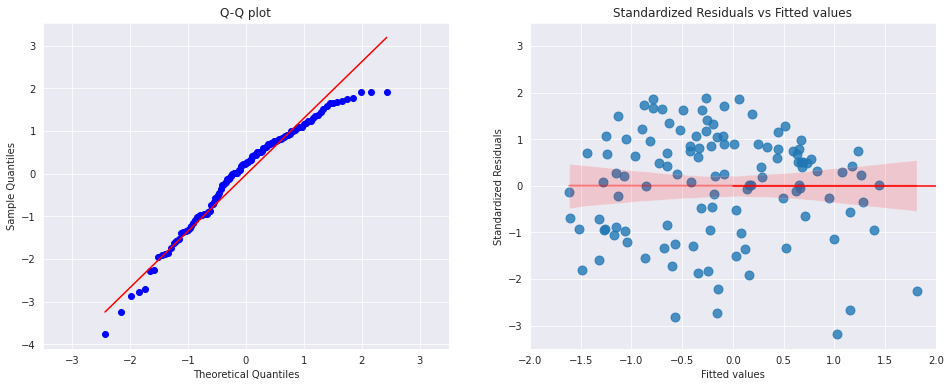

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked1,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(y_masked) - x_masked1.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x_masked1[:,1])
leverage = ( (1/len(x_masked1)) 
             + (((x_masked[:,1] - mean_independent_variable)**2) 
                / np.sum((x_masked1[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=False, 
            scatter_kws={'s':80}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(-2,2)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
plt.xlim([-2,2]);

QQplot after log transformation of data indicates that residuals are still skewed, hence the condition that the error terms are normally distributed is not met. However, additional tests for normality should be considered (e.g. Shapiro-Wilks normality test).

Coefficient for determinancy for log transformed (y) data

In [ ]:
# SStotal
sstotallog = ss_total(y_masked)

# SSReg
ssreglog = ss_reg(predictions, y_masked)

# SSRes
ssreslog = ss_res(predictions, y_masked)

### R^2
rsqlog = 1 - (ssreslog / sstotallog)

print('SStotallog:', round(sstotallog,4))
print('SSreglog:', round(ssreglog,4))
print('SSreslog:', round(ssreslog,4))
print('Coefficient of Determinacy logged:', np.round(rsqlog,2))

SStotallog: 251.0691
SSreglog: 74.9392
SSreslog: 176.1299
Coefficient of Determinacy logged: 0.3


Log transforming the data does improves determinancy coefficient from 0.27 to 0.3.

- d) Write the population regression equation for your model. Interpret the meaning of the values of 
the parameters beta0 and beta1

Population regression model $\hat{Y} = \beta_0 + \beta_1X + u$, is a linear function that shows theoretical relationship between a dependable variable  $\hat{Y}$ and explanatory variable ${X}$, where $\beta_0$ is an intercept and  $\beta_1$ is a slope coefficient. In population regression model $u$ term is introduced as stochastic error term. To express how number of confirmed covid cases correlates with consumption of vegetable products, our model can be re-written as $\hat{Y}_{covid} = 7.6036 -0.1583X_{vegetables} + u$ in a linear scale and in logarithmic scale $log(\hat{Y}_{covid}) = 5.1090 -0.1427X_{vegetables} +u$. 

- e) Find the correlation and determinacy coefficients. Analyse and comment on  the meaning of both.


Rsquare can be checked this way.

In [ ]:
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))
print('Coefficient of Determinacy for y-logged data:',round(r2_score(y_true=y_masked, y_pred=predictions),2))

Coefficient of Determinacy: 0.27
Coefficient of Determinacy for y-logged data: 0.3


R2 of a model is 0.30, so approximately 30% of the observed variation can be explained by the model's inputs.

Or this way:

In [ ]:
### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy
# in this case, we will just reshape predictions to (209,)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2) 

# SStotal
sstotal = ss_total(y1)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y1) - 1 ) * np.var(y1, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y1)

# SSRes
ssres = ss_res(predictions_with_intercept, y1)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 346.0593
SSreg: 92.231
SSres: 253.8283
Coefficient of Determinacy, model with intercept: 0.27


In [ ]:
# SStotal
sstotal = ss_total(y_masked)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y_masked) - 1 ) * np.var(y_masked, ddof=1) 

# SSReg
ssreg = ss_reg(predictions, y_masked)

# SSRes
ssres = ss_res(predictions, y_masked)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept when y-logged:', np.round(rsq_with_intercept,2))

SStotal: 251.0691
SSreg: 74.9392
SSres: 176.1299
Coefficient of Determinacy, model with intercept when y-logged: 0.3


Calculate correlation coefficient

In [ ]:
print('Correlation in linear model:',np.corrcoef(y1,x_masked1[:,1])[0,1])
print('Correlation in logged model:',np.corrcoef(y_masked,x_masked1[:,1])[0,1])

Correlation in linear model: -0.5162536971693247
Correlation in logged model: -0.5463334821741734



- f) Test the statistical hypothesis for determining whether a linear relationship exists between the 
chosen variables.


Here we are testing if beta parameters is equal to zero (hypothesis 0) versus beta not equal to zero (hypothesis 1).

In [ ]:
sigma_degrees_of_freedom = (x_masked1.shape[0]-x_masked1.shape[1])
sigma_sqr = np.sum(residuals**2)/ sigma_degrees_of_freedom

variance_covmatrix = inv(dot(x_masked1.T,x_masked1)) * sigma_sqr
coeff_stde = np.diag(np.sqrt(variance_covmatrix))

print('Coefficients\' Standard Errors for beta0(y-intercept) and beta1(slope) :',coeff_stde)
expected_value = 0.0

for i in range(len(beta)):    
    ttest = (beta[i] - expected_value) / coeff_stde[i]

    #Degrees of freedom
    df = x_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))
    print('Degrees of freedom',sigma_degrees_of_freedom)

Coefficients' Standard Errors for beta0(y-intercept) and beta1(slope) : [0.75391929 0.02022637]
Test statistc for coefficient estimate  0 : [6.77669109] | P-value: [0.]
Degrees of freedom 117
Test statistc for coefficient estimate  1 : [-7.05554887] | P-value: [0.]
Degrees of freedom 117


Analysis of Variability (ANOVA) table to test if slope is significantly different from 0. Note: can calculate it if have extra time.


- g) Construct and interpret a 95% confidence interval for the unknown true slope (beta1) of the regression line. Note: formula in page 51. Calculated by hand -0.1027 to -0.1828

In [ ]:
sigma_degrees_of_freedom = (x_masked1.shape[0]-x_masked1.shape[1])
print("this is SE for slope", coeff_stde[1])
print("this is slope", beta[1])
print("this is t for 117 degrees of freedom and 95%", stats.t.ppf(q=1-.05/2, df=sigma_degrees_of_freedom))
t=stats.t.ppf(q=1-.05/2, df=sigma_degrees_of_freedom)
CI1=beta[1]+(coeff_stde[1]*t)
CI2=beta[1]-(coeff_stde[1]*t)

print("this a 95% for our slope", CI1,"to", CI2)


this is SE for slope 0.020226370846403843
this is slope [-0.14270815]
this is t for 117 degrees of freedom and 95% 1.9804475986497292
this a 95% for our slope [-0.10265088] to [-0.18276542]


- h) Construct a 95% confidence interval for the population correlation coefficient. Interpret the results. NOTE: page 62

In [ ]:
rp = stats.pearsonr(x_masked1[:,1],y_masked)
#np.corrcoef(y_masked,x_masked1[:,1])[0,1]

#The first step involves transformation of the correlation coefficient into a Fishers’ Z-score.
rz = np.arctanh(rp[0])



se = 1/np.sqrt(x_masked1[:,1].size-3)


t_critical = stats.t.ppf(1 - 0.05 / 2, df=sigma_degrees_of_freedom)


z = stats.norm.ppf(1-0.05/2)
lo_z, hi_z = rz-z*se, rz+z*se

lo, hi = np.tanh((lo_z, hi_z))


print("95% confidence interval for correlation coefficient:", lo,"to", hi)



95% confidence interval for correlation coefficient: -0.661298524023733 to -0.4062916807848417


Or another way to calculate it

In [ ]:
n=119
rr=rp[0]
CI_rlow=rp[0]-t_critical*np.sqrt((1-(rr)**2)/(n-2))
CI_rup=rp[0]+t_critical*np.sqrt((1-(rr)**2)/(n-2))

print("95% confidence interval for correlation coefficient:", CI_rlow, "to", CI_rup)

95% confidence interval for correlation coefficient: -0.6996858085484503 to -0.39298115579989634


- i) Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of 
your choice of the other variable. Interpret your result and indicate if the prediction interval is 
useful. Page 54

In [ ]:
t_117=stats.t.ppf(q=1-.05/2, df=sigma_degrees_of_freedom) 
x_chosen=45 
log_y_estimated=5.1090-0.1427*x_chosen 
n=119 
x_med=Average(x_masked1[:,1])
m=1 #predictors
MSE=ssreslog/(n-m-1)

s=np.sqrt(MSE)


CI_45_up=log_y_estimated+t_117*s*(np.sqrt(1/n+((x_chosen-x_med)**2)/ss_total(x_masked1[:,1])))
CI_45_down=log_y_estimated-t_117*s*(np.sqrt(1/n+((x_chosen-x_med)**2)/ss_total(x_masked1[:,1])))

print("95% confidence interval for chosen x=45 is:",CI_45_up, "to", CI_45_down)


- j) Construct and interpret a 95% prediction interval for a randomly chosen value of the y‐variable at 
a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction 
interval is useful. Note: page 60. I will choose close to max vegetable consumption: x=45. My model is: $log(\hat{Y}_{covid}) = 5.1090 -0.1427X_{vegetables} +u$. 

In [ ]:
t_117=stats.t.ppf(q=1-.05/2, df=sigma_degrees_of_freedom) 
x_chosen=45 
log_y_estimated=5.1090-0.1427*x_chosen 
n=119 
x_med=Average(x_masked1[:,1])

m=1 #predictors
MSE=ssreslog/(n-m-1)

s=np.sqrt(MSE)

PI_45_up=log_y_estimated+t_117*s*(np.sqrt(1+1/n+((x_chosen-x_med)**2)/ss_total(x_masked1[:,1])))
PI_45_down=log_y_estimated-t_117*s*(np.sqrt(1+1/n+((x_chosen-x_med)**2)/ss_total(x_masked1[:,1])))



print("95% prediction interval for chosen x=45 is:",PI_45_up, "to", PI_45_down)


Just testing area below

In [ ]:
sstotal = np.sum(y1**2)
ssreg = np.sum(predictions[:,0]**2)
ssres = ss_res(predictions, y1)


### R^2
rsq_without_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model without intercept:', np.round(rsq_without_intercept,2))

# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)


bi=ss_total(x_masked1[:,1])

print(bi)

NOTES: there was some problem with some code and we should use this somewhere: !pip install plotly==4.0.0


# 3. Principal Component Analysis
## Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set relates to. Explain your choice.
 We have selected Stimulants, Alcohol, Sugar, Vegetable and Animal products for PCA analysis to see if healthier food consumption (vegetable consumption) would be separated from unhealthy foods. 


### Tasks

- a) Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

Note: Choosing Stimulants, Alcohol, Sugar, Vegetable and Animal products for PCA analysis 
 

First, we need to create target groups. We decided to assign target based on percentage of confirmed covid cases per population (low, medium and high). To better understand our data, we decided to plot a frequency distribution in order to divide better into 3 classes.

Text(0.5, 0, 'Data')

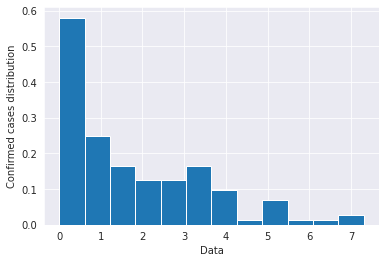

In [ ]:
y_values = data['Confirmed']
plt.hist(y_values, density=True, bins=12)  # density=False would make counts
plt.ylabel('Confirmed cases distribution')
plt.xlabel('Data')
#divide into 7.4 to 3, 1 to 3 and 1 down

Looking at frequency distribution, we decided to divide data into 3 groups.

In [ ]:
data['y_value_bins'] = pd.cut(x=y_values, bins=[0, 1, 3, 8])
#print(data['Confirmed'],data['y_value_bins'])
# data['y_value_bins'].unique() #check that everything binned correctly
#data['covid_classes'] = pd.cut(x=y_values, bins=[0, 1, 3, 8], labels=['low', 'medium', 'high'])
data['covid_classes'] = pd.cut(x=y_values, bins=[0, 0.5, 1.5, 8], labels=['low', 'medium', 'high'])


target=data['covid_classes']
#print(data['Confirmed'],data['y_value_bins'], data['covid_classes'])

In [ ]:
#x_pca = data[['Vegetal Products', 'Stimulants', 'Alcoholic Beverages','Sugar & Sweeteners','Animal Products']].values
x_pca = data[['Vegetal Products', 'Animal Products','Alcoholic Beverages']].values

Now we need to normalise our data using different ways. We will try range, ranking and z-scoring normalisation methods.

In [ ]:
#Normalize the data by range
means = x_pca.mean(axis=0)
Rmax = x_pca.max(axis=0)
Rmin = x_pca.min(axis=0)
x_norm_range = (x_pca - means)/(Rmax - Rmin)

In [ ]:
#Normalize the data by z-scoring
means = x_pca.mean(axis=0) # axis=0 means working along the row
std=x_pca.std(axis=0)
x_norm_z = (x_pca - means)/(std)


In [ ]:
## Covariance matrix of the z-score normalized dataset
covmatrix_r = np.cov(x_norm_range.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e_r, v_r = np.linalg.eig(covmatrix_r)

# order descendingly by largest eigenvalue
order_r = np.argsort((np.argsort(e_r) * -1))
e_r = e_r[order_r]
v_r = v_r[:,order_r]

print('Eigenvalues \n%s' %e_r)
print('\nEigenvectors \n%s' %v_r)

Eigenvalues 
[2.14368606e-08 1.22015283e-01 3.87162102e-02]

Eigenvectors 
[[ 7.07145877e-01 -6.46572516e-01  2.86162000e-01]
 [ 7.07067680e-01  6.46608040e-01 -2.86274933e-01]
 [ 6.28538716e-05  4.04774040e-01  9.14416739e-01]]


In [ ]:
## Covariance matrix of the z-score normalized dataset
covmatrix_z = np.cov(x_norm_z.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e_z, v_z = np.linalg.eig(covmatrix_z)

# order descendingly by largest eigenvalue
order_z = np.argsort((np.argsort(e_z) * -1))
e_z = e_z[order_z]
v_z = v_z[:,order_z]

print('Eigenvectors \n%s' %e_z)
print('\nEigenvalues \n%s' %v_z)

Eigenvectors 
[3.98985784e-07 2.28407007e+00 7.41353256e-01]

Eigenvalues 
[[ 7.07119425e-01 -6.42988043e-01  2.94191256e-01]
 [ 7.07094135e-01  6.42974678e-01 -2.94281239e-01]
 [ 6.17894618e-05  4.16112892e-01  9.09312959e-01]]


In [ ]:
w, v = np.linalg.eig(covmatrix_z)
print(w)
print(v)

[2.28407007e+00 3.98985784e-07 7.41353256e-01]
[[-6.42988043e-01  7.07119425e-01  2.94191256e-01]
 [ 6.42974678e-01  7.07094135e-01 -2.94281239e-01]
 [ 4.16112892e-01  6.17894618e-05  9.09312959e-01]]


In [ ]:
# generate PCA component space (PCA scores) for range normalised data
pc_r = np.dot(x_norm_range, v_r)

In [ ]:
# generate PCA component space (PCA scores) for z-score normalised data
pc_z= np.dot(x_norm_z, v_z)

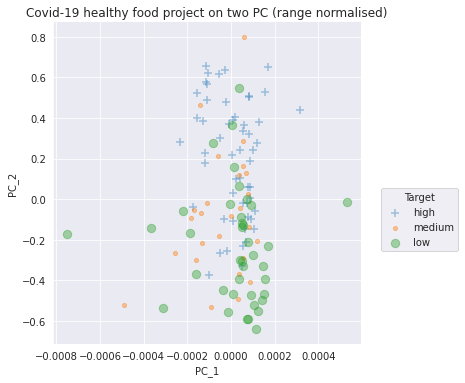

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["PC_"+str(x+1) for x in range(pc_r.shape[1])]
names.append('covid_classes')
data_pca_r = pd.DataFrame(data= np.c_[pc_r, target], 
                     columns=names)


ax = sns.lmplot('PC_1', 
                'PC_2', 
                data=data_pca_r, 
                hue='covid_classes', 
                markers=['+','.','o'],
                fit_reg=False,
                scatter_kws={'alpha':0.4, "s": 70}, 
                legend_out=False)
plt.title('Covid-19 healthy food project on two PC (range normalised)')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Target');

In [ ]:

data['covidc'] = pd.cut(x=y_values, bins=[0, 0.5, 1.5, 8], labels=['1', '2', '3'])
target2=data['covidc']
names = ["PC_"+str(x+1) for x in range(pc_r.shape[1])]
names.append('covidc')
data_pca_r2 = pd.DataFrame(data= np.c_[pc_r, target2], 
                     columns=names)
data_pca_r2['covidc'] = data_pca_r2['covidc'].astype(int)

In [ ]:
data_pca_r2['PC_1']=data_pca_r2['PC_1'].astype(float)
data_pca_r2['PC_2']=data_pca_r2['PC_2'].astype(float)
data_pca_r2['PC_3']=data_pca_r2['PC_3'].astype(float)

Add 3D plot for range normalised PCA data

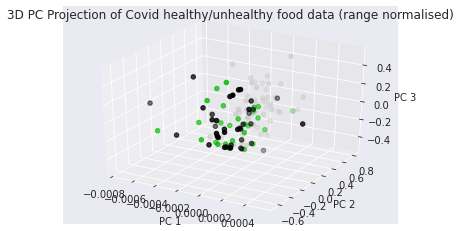

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xs=data_pca_r2['PC_1'], 
           ys=data_pca_r2['PC_2'],
           zs=data_pca_r2['PC_3'],
           c=data_pca_r2['covidc'], cmap=plt.cm.nipy_spectral);

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PC Projection of Covid healthy/unhealthy food data (range normalised)');

Now plot z_score normalised data

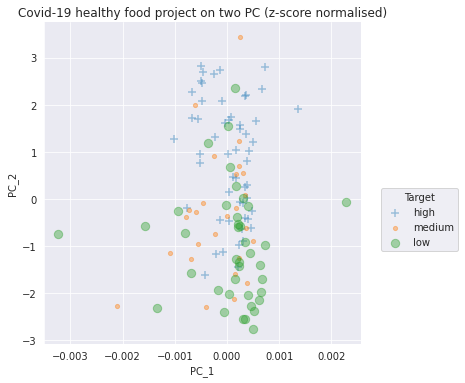

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["PC_"+str(x+1) for x in range(pc_z.shape[1])]
names.append('covid_classes')
data_pca_z = pd.DataFrame(data= np.c_[pc_z, target], 
                     columns=names)


ax = sns.lmplot('PC_1', 
                'PC_2', 
                data=data_pca_z, 
                hue='covid_classes', 
                markers=['+','.','o'],
                fit_reg=False,
                scatter_kws={'alpha':0.4, "s": 70}, 
                legend_out=False)
plt.title('Covid-19 healthy food project on two PC (z-score normalised)')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Target');

In [ ]:
data['covidc'] = pd.cut(x=y_values, bins=[0, 0.5, 1.5, 8], labels=['1', '2', '3'])
target2=data['covidc']
names = ["PC_"+str(x+1) for x in range(pc_z.shape[1])]
names.append('covidc')
data_pca_z2 = pd.DataFrame(data= np.c_[pc_z, target2], 
                     columns=names)
data_pca_z2['covidc'] = data_pca_z2['covidc'].astype(int)

data_pca_z2['PC_1']=data_pca_z2['PC_1'].astype(float)
data_pca_z2['PC_2']=data_pca_z2['PC_2'].astype(float)
data_pca_z2['PC_3']=data_pca_z2['PC_3'].astype(float)

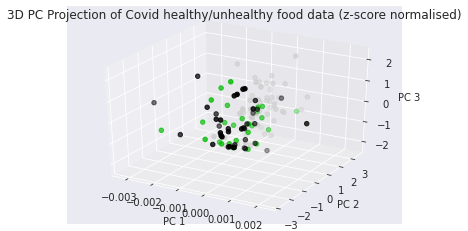

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xs=data_pca_z2['PC_1'], 
           ys=data_pca_z2['PC_2'],
           zs=data_pca_z2['PC_3'],
           c=data_pca_z2['covidc'], cmap=plt.cm.nipy_spectral);

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PC Projection of Covid healthy/unhealthy food data (z-score normalised)');

- b) Choose between conventional PCA or SVD for the visualization. Make a comment whether one of 
the normalizations is better and why. 
- c) At these visualizations, use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups.

In [ ]:
u, s, vh = np.linalg.svd(x_norm_z, full_matrices=True)

## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 

          U_1       U_2 covid_cases
0    -2.07928  -1.38114        high
1    -1.26479   1.86627        high
2    -2.33091   2.24272        high
3   -0.449596 -0.480786        high
4    -1.68839  0.157178        high
..        ...       ...         ...
114   0.57925  -1.25172         low
115   1.39638   1.96833         low
116   2.55144  0.157318         low
117  0.725452  0.231411         low
118   2.26775 -0.461204         low

[119 rows x 3 columns]


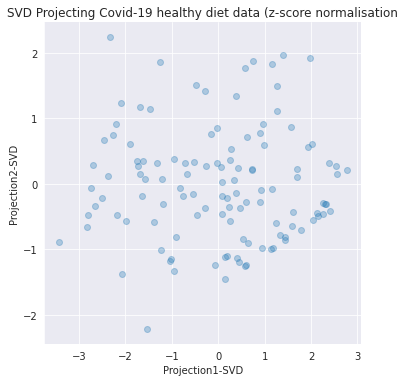

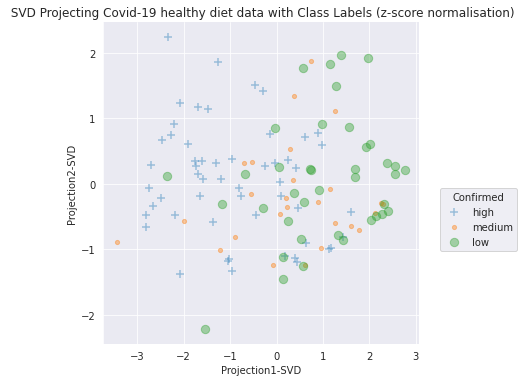

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
names.append('covid_cases')
ds_us = pd.DataFrame(data= np.c_[u1, u2, target], 
                     columns=names)
#ds_us['covidc'] = ds_us['covidc'].astype(int)

print(ds_us)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting Covid-19 healthy diet data (z-score normalisation');

# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='covid_cases', 
               markers=['+','.','o'],
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Covid-19 healthy diet data with Class Labels (z-score normalisation)');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Confirmed');

In [ ]:
u, s, vh = np.linalg.svd(x_norm_range, full_matrices=True)

## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 

          U_1        U_2 covid_cases
0   -0.486528  -0.312719        high
1   -0.284236   0.428223        high
2   -0.529003   0.515726        high
3   -0.105989  -0.109241        high
4   -0.389532  0.0382616        high
..        ...        ...         ...
114  0.128457  -0.286837         low
115   0.33124   0.447848         low
116  0.590357   0.032406         low
117  0.168664  0.0518728         low
118  0.522116   -0.10854         low

[119 rows x 3 columns]


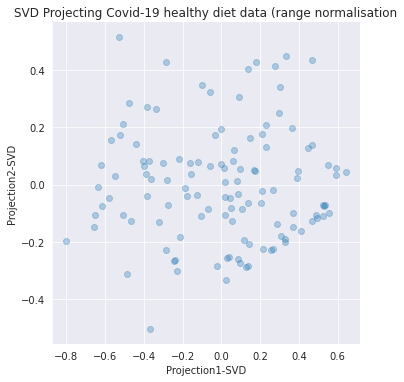

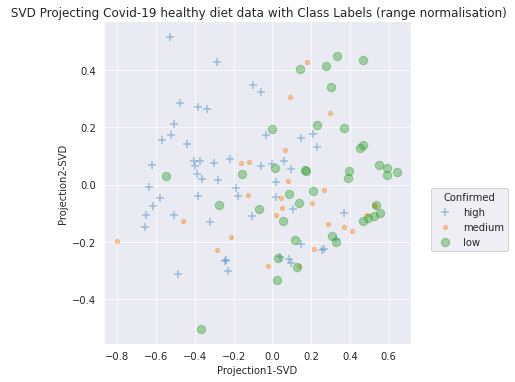

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
names.append('covid_cases')
ds_us = pd.DataFrame(data= np.c_[u1, u2, target], 
                     columns=names)
#ds_us['covidc'] = ds_us['covidc'].astype(int)

print(ds_us)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting Covid-19 healthy diet data (range normalisation');

# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='covid_cases', 
               markers=['+','.','o'],
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Covid-19 healthy diet data with Class Labels (range normalisation)');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Confirmed');

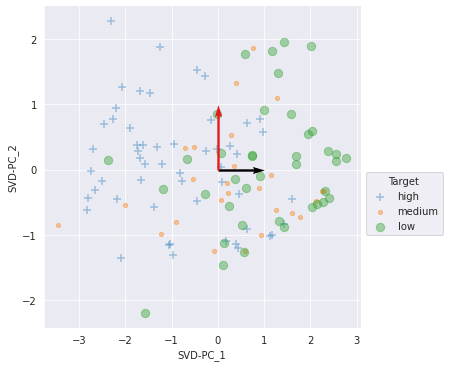

In [ ]:
projected_x= np.dot(x_norm_z,vh.T)
v_norm= np.dot(vh.T, vh)

names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('covid_cases')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], target], 
                      columns=names)
ds_svd['covid_cases'] = ds_svd['covid_cases'].astype(str)
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='covid_cases', 
           markers=['+','.','o'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70}, 
           legend_out=False, height=5)
plt.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.legend(bbox_to_anchor=(1, 0.5), title='Target');

d) Calculate and make a graphical presentation of the “quality” of the PC projection of your data. Discuss your results.
Ok, until here. 

In [ ]:
!pip install plotly==4.0.0


In [ ]:
## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered

e, v = np.linalg.eig(covmatrix_z)

totVar = sum(e)       #Total variability of the Data
var_exp = [(i / totVar)*100 for i in sorted(e, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='Cum. Exp Var')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
plot(fig)

NameError: ignored

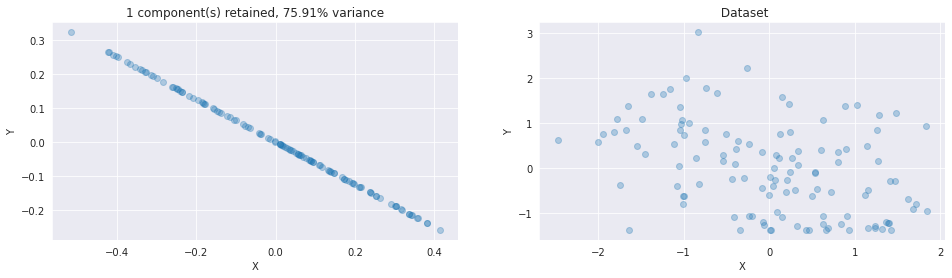

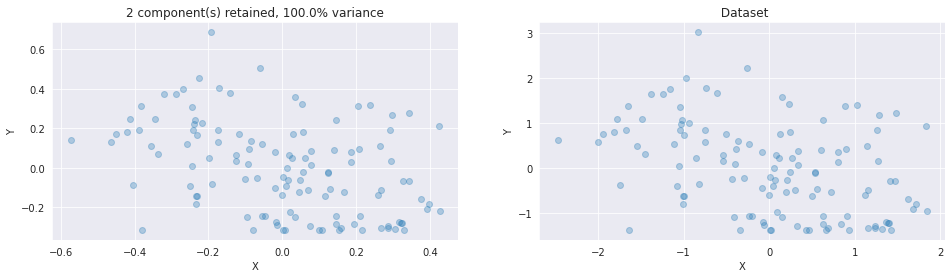

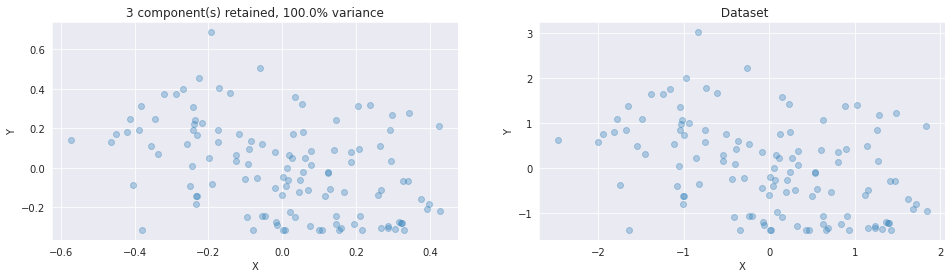

In [ ]:
r = x_pca.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 3
f1=0   #
f2=2   #

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
              y=approximation[:,f2],
              fit_reg=False,
              scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'X', 
           ylabel= 'Y',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=x_norm_z[:,f1],
                y=x_norm_z[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='X', 
           ylabel= 'Y',
           title=' Dataset');


In [ ]:
#print(var_explained)
#Before normalisation

# calculate mean
m = sum(x_pca) / len(x_pca)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in x_pca) / len(x_pca)

print(var_res)

#After range normalisation

# calculate mean
m = sum(x_norm_range) / len(x_norm_range)

# calculate variance using a list comprehension
var_res_range = sum((xi - m) ** 2 for xi in x_norm_range) / len(x_norm_range)

print(var_res_range)

#After z-score normalisation

# calculate mean
m = sum(x_norm_z) / len(x_norm_z)

# calculate variance using a list comprehension
var_res_z = sum((xi - m) ** 2 for xi in x_norm_z) / len(x_norm_z)

print(var_res_z)





[30.92177045 30.92639804  5.03759794]
[0.05372436 0.0537324  0.05192406]
[1. 1. 1.]


# 4. Fuzzy Clustering with Anomalous Patterns


Guys, what she also said during lab last time. i) First we derive membership matrix and use it to initialise fuzzy k-means. ii) Also, we do not vary seed (fix same for all runs). iii) You must fix and justify threshold you are going to use. Hope those random sentences make sense...


###Tasks

a) Study the fuzzy c-means (FCM) program in the software package of your choice. Apply the program to your dataset at the same c parameter with random seeds. Do this for several different values of parameter c= c_min, ..., c_max. Plot the FCM clustering criterion (FCM cost function) in function of c. Analyse the graphic and comment if any number of clusters better fits your data than the others.

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 20.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=ae04b7fcf0ab9e05d187e1edd0369b18872b4bec1e04df3626b2dee271eafc0b
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Importing again to help testing

In [ ]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# Pandas also for data management
import pandas as pd

url = 'https://raw.githubusercontent.com/Migaalee/PAD/main/Food_Supply_Quantity_kg_Data_filtered.csv'
data = pd.read_csv(url)
data.shape

print(data)

     Alcoholic Beverages  Animal Products  ...    Deaths  Recovered
0                 2.2188          22.8328  ...  0.104180   5.757074
1                 8.0858          14.6038  ...  0.072468   5.945253
2                 9.8498          17.8065  ...  0.100560   5.155319
3                 2.5343          15.5347  ...  0.061265   5.241050
4                 4.9933          18.9196  ...  0.117879   4.372420
..                   ...              ...  ...       ...        ...
114               0.0000          13.1178  ...  0.003348   0.030842
115               5.8087           4.9278  ...  0.001208   0.029915
116               1.0338           3.7603  ...  0.001641   0.027798
117               2.8904          10.1637  ...  0.001160   0.019594
118               0.0364           5.7874  ...  0.002032   0.004640

[119 rows x 10 columns]


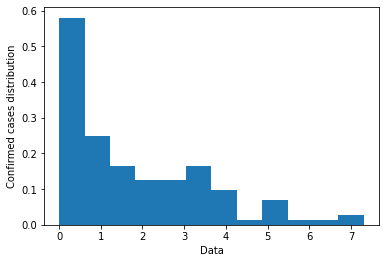

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

#orgainze the data
y_values = data['Confirmed']
plt.hist(y_values, density=True, bins=12)  # density=False would make counts
plt.ylabel('Confirmed cases distribution')
plt.xlabel('Data')


data['y_value_bins'] = pd.cut(x=y_values, bins=[0, 1, 3, 8])
#print(data['Confirmed'],data['y_value_bins'])
#data['y_value_bins'].unique() #check that everything binned correctly
#data['covid_classes'] = pd.cut(x=y_values, bins=[0, 1, 3, 8], labels=['low', 'medium', 'high'])
data['covid_classes'] = pd.cut(x=y_values, bins=[0, 0.5, 1.5, 8], labels=['low', 'medium', 'high'])


target=data['covid_classes']
#print(data['Confirmed'],data['y_value_bins'], data['covid_classes'])


x_fpc = data[['Alcoholic Beverages','Animal Products','Fish, Seafood','Stimulants','Sugar & Sweeteners','Vegetal Products','Obesity']].values
#print(x_fpc)


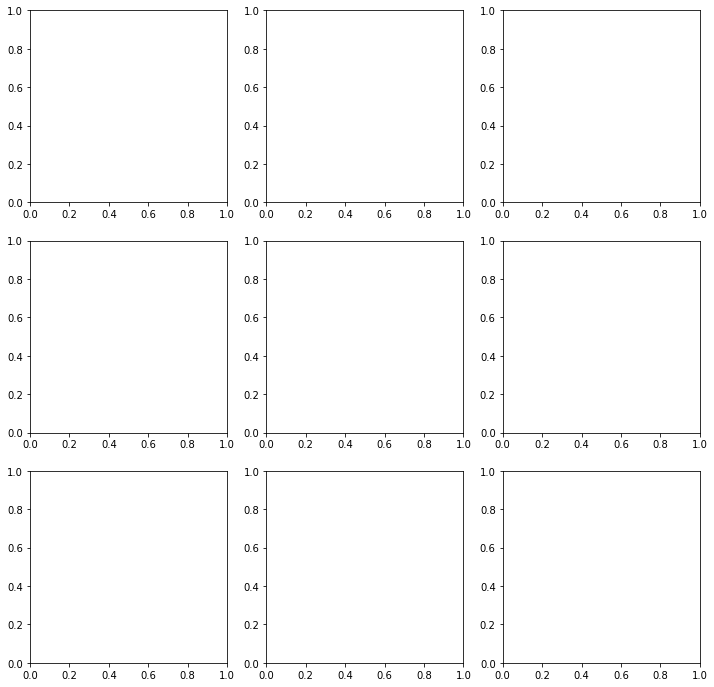

In [ ]:
#Now do the magic to the data

#Normalize the data by range
means = x_fpc.mean(axis=0)
Rmax = x_fpc.max(axis=0)
Rmin = x_fpc.min(axis=0)
x_norm_range = (x_fpc - means)/(Rmax - Rmin)

#Normalize the data by z-score
means = x_fpc.mean(axis=0) # axis=0 means working along the row
std=x_fpc.std(axis=0)
x_norm_z = (x_fpc - means)/(std)
#print(x_norm_range)

xpts = np.hstack((x_norm_z))
#print(xpts)
ypts = np.hstack((y_values))
for i in range(6): 
   ypts =  np.concatenate((ypts,np.hstack((y_values))),axis=None)

#print(ypts)

alldata = np.vstack((xpts, ypts))
#print(alldata)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Text(0, 0.5, 'Fuzzy partition coefficient')

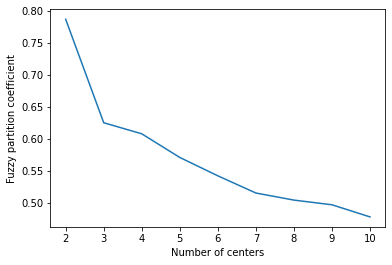

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(12, 12))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    print(cluster_membership)
    for j in range(ncenters):
#        print(cluster_membership)
#        print("espaço")
#        print(xpts[cluster_membership])
#        print("espaço")
#        print(xpts[j])
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()


fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

NOTES: she said for e) if our data is unlabeled do not do Adjust rand index, instead other index could be used (Silhoutte?)